### Anggota kelompok 3:
1. Dasmond Tan - 70110 
2. Willsen Wijaya - 70011
3. James Andersen - 69612
4. Lian Wira Manuel Maharaja - 75938
5. Gregorius Daniel Dwitama - 75740


### Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.dropna()
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Data Preprocessing

In [3]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [4]:
df.dropna(inplace=True)
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,37064.313506,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,20995.098457,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,77.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,18605.000000,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,37608.000000,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,55220.000000,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


In [8]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


### Visualisasi Data

In [9]:
features = ['avg_glucose_level', 'bmi']
target = ['stroke']

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

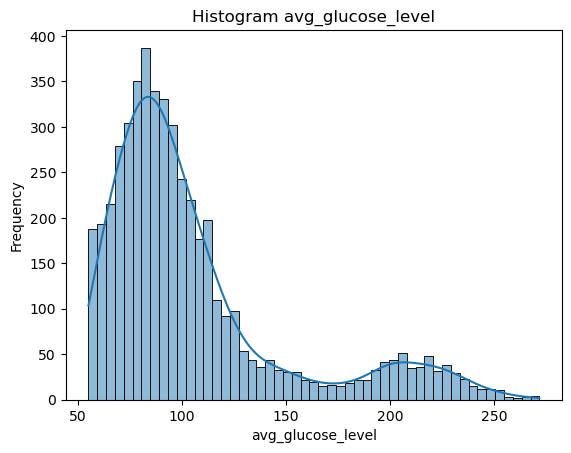

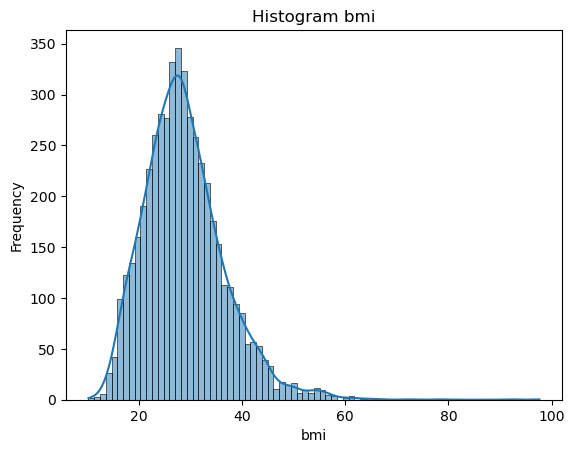

In [11]:
num_features = ['avg_glucose_level', 'bmi']
for feature in num_features:
    sns.histplot(df[feature], kde=True)
    plt.title(f'Histogram {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

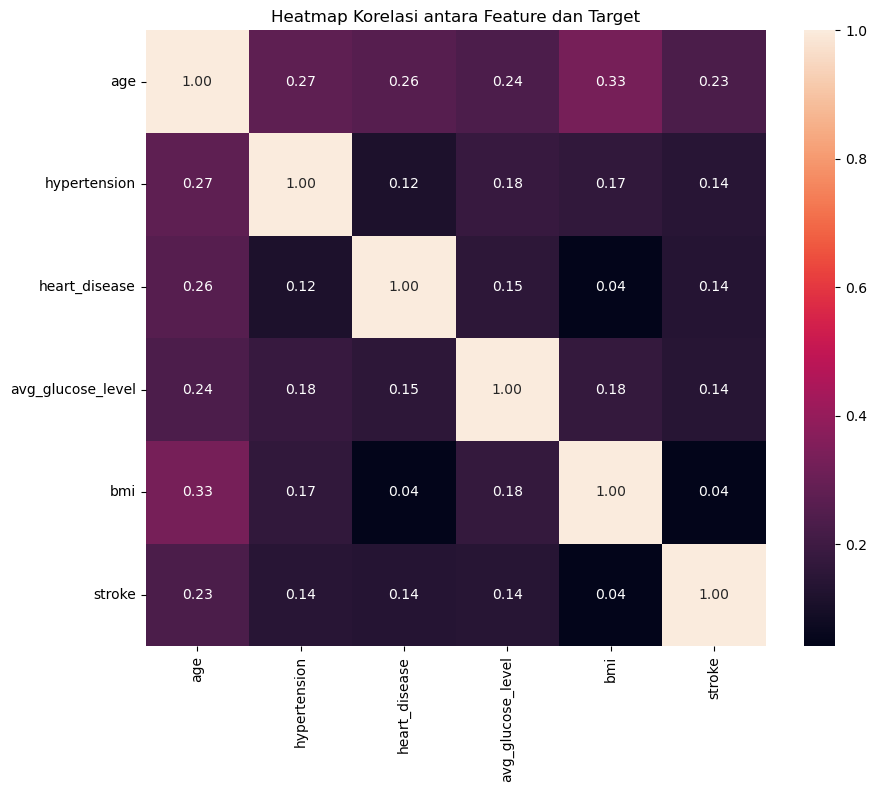

In [12]:
correlation_matrix = df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Heatmap Korelasi antara Feature dan Target')
plt.show()


### Handiling outlier

Text(0, 0.5, 'Avg Glucose Level')

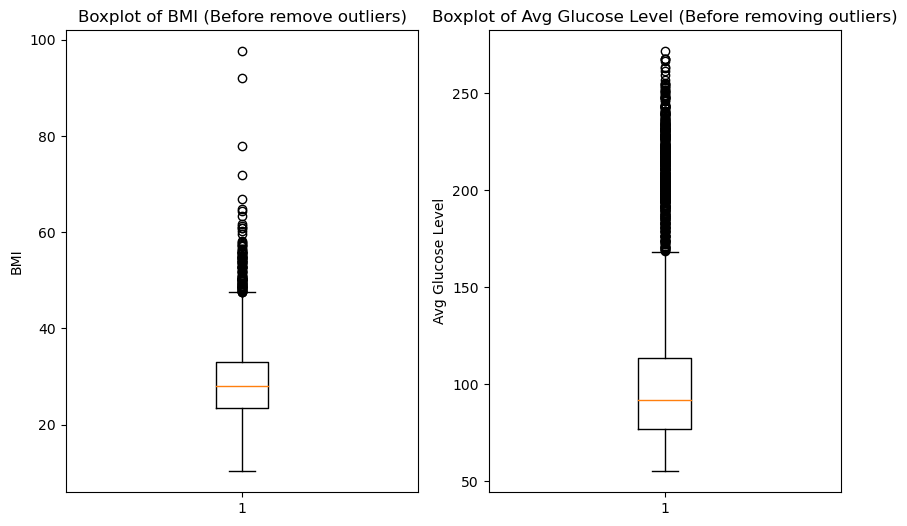

In [13]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.boxplot(df['bmi'])
plt.title('Boxplot of BMI (Before remove outliers)')
plt.ylabel('BMI')

plt.subplot(1, 2, 2)
plt.boxplot(df['avg_glucose_level'])
plt.title('Boxplot of Avg Glucose Level (Before removing outliers)')
plt.ylabel('Avg Glucose Level')

In [14]:
from scipy import stats
for feature in features:
    zscores = np.abs(stats.zscore(df[feature]))
    threshold = 3
    outlier_indices = np.where(zscores > threshold)
    outlier_values = df[feature].iloc[outlier_indices]
    print(f"Outlier Indices for {feature}:", outlier_indices)
    print(f"Outlier Values for {feature}:", outlier_values)

Outlier Indices for avg_glucose_level: (array([  27,   38,   62,   80,  103,  104,  112,  125,  158,  161,  182,
        204,  216,  263,  290,  302,  344,  506,  517,  659,  704,  734,
       1009, 1012, 1053, 1144, 1164, 1311, 1362, 1379, 1449, 1543, 2073,
       2093, 2146, 2161, 2180, 2345, 2508, 2568, 2624, 2781, 2944, 3187,
       3234, 3236, 3321, 3444, 3603, 3872, 4069, 4173, 4263, 4272, 4285,
       4411, 4522, 4717, 4788, 4838], dtype=int64),)
Outlier Values for avg_glucose_level: 33      252.72
45      243.58
76      240.09
97      240.59
122     259.63
123     249.31
135     263.32
149     239.07
193     271.74
196     242.52
220     250.89
243     247.51
256     243.53
303     242.30
330     243.50
343     239.64
386     251.60
552     247.69
563     239.82
708     240.71
755     250.20
785     254.60
1067    254.63
1070    246.34
1113    251.46
1207    267.76
1228    239.52
1384    246.53
1436    244.28
1453    251.99
1529    253.16
1626    242.84
2182    249.29
2203    2

In [15]:
for feature in features:
    zscores = np.abs(stats.zscore(df[feature]))
    df = df[zscores <= threshold]

Text(0, 0.5, 'Avg Glucose Level')

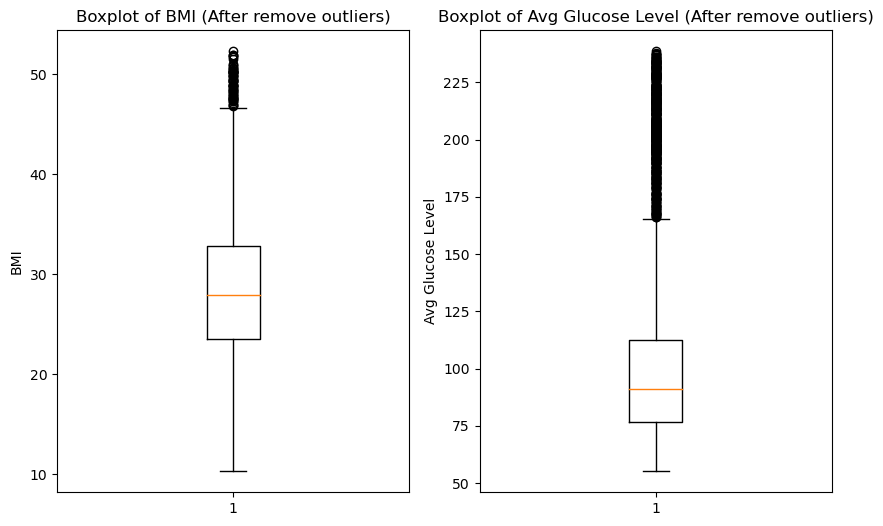

In [16]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.boxplot(df['bmi'])
plt.title('Boxplot of BMI (After remove outliers)')
plt.ylabel('BMI')

plt.subplot(1, 2, 2)
plt.boxplot(df['avg_glucose_level'])
plt.title('Boxplot of Avg Glucose Level (After remove outliers)')
plt.ylabel('Avg Glucose Level')

### Modeling

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

print("Size of training data:", X_train.shape[0])
print("Size of testing data:", X_test.shape[0])

Size of training data: 3833
Size of testing data: 959


### Decision Tree tanpa pruning

In [18]:
model = DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

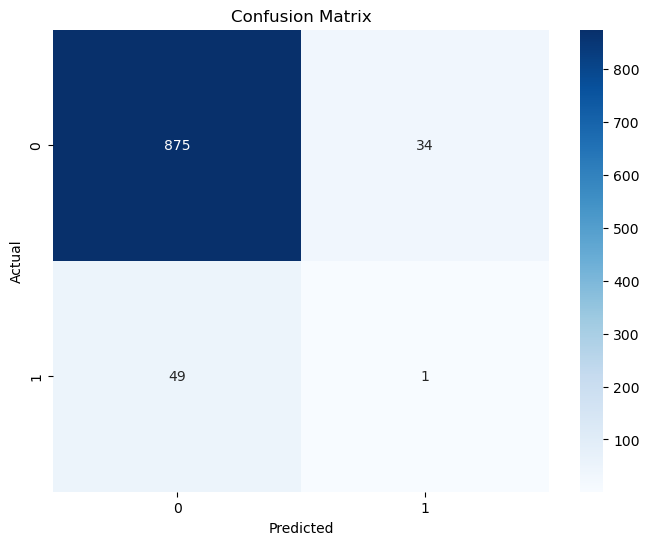


Accuracy: 0.913451511991658

Cross-Validation Scores:  [0.92075078 0.91762252 0.91753653 0.93319415 0.92066806]
Mean Accuracy:  0.9219544105833973
Standard Deviation:  0.005791686145734314


In [19]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / np.sum(conf_matrix)
print("\nAccuracy:", accuracy)

scores = cross_val_score(model, df[features], df[target], cv=5, scoring='accuracy')

print("\nCross-Validation Scores: ", scores)
print("Mean Accuracy: ", np.mean(scores))
print("Standard Deviation: ", np.std(scores))

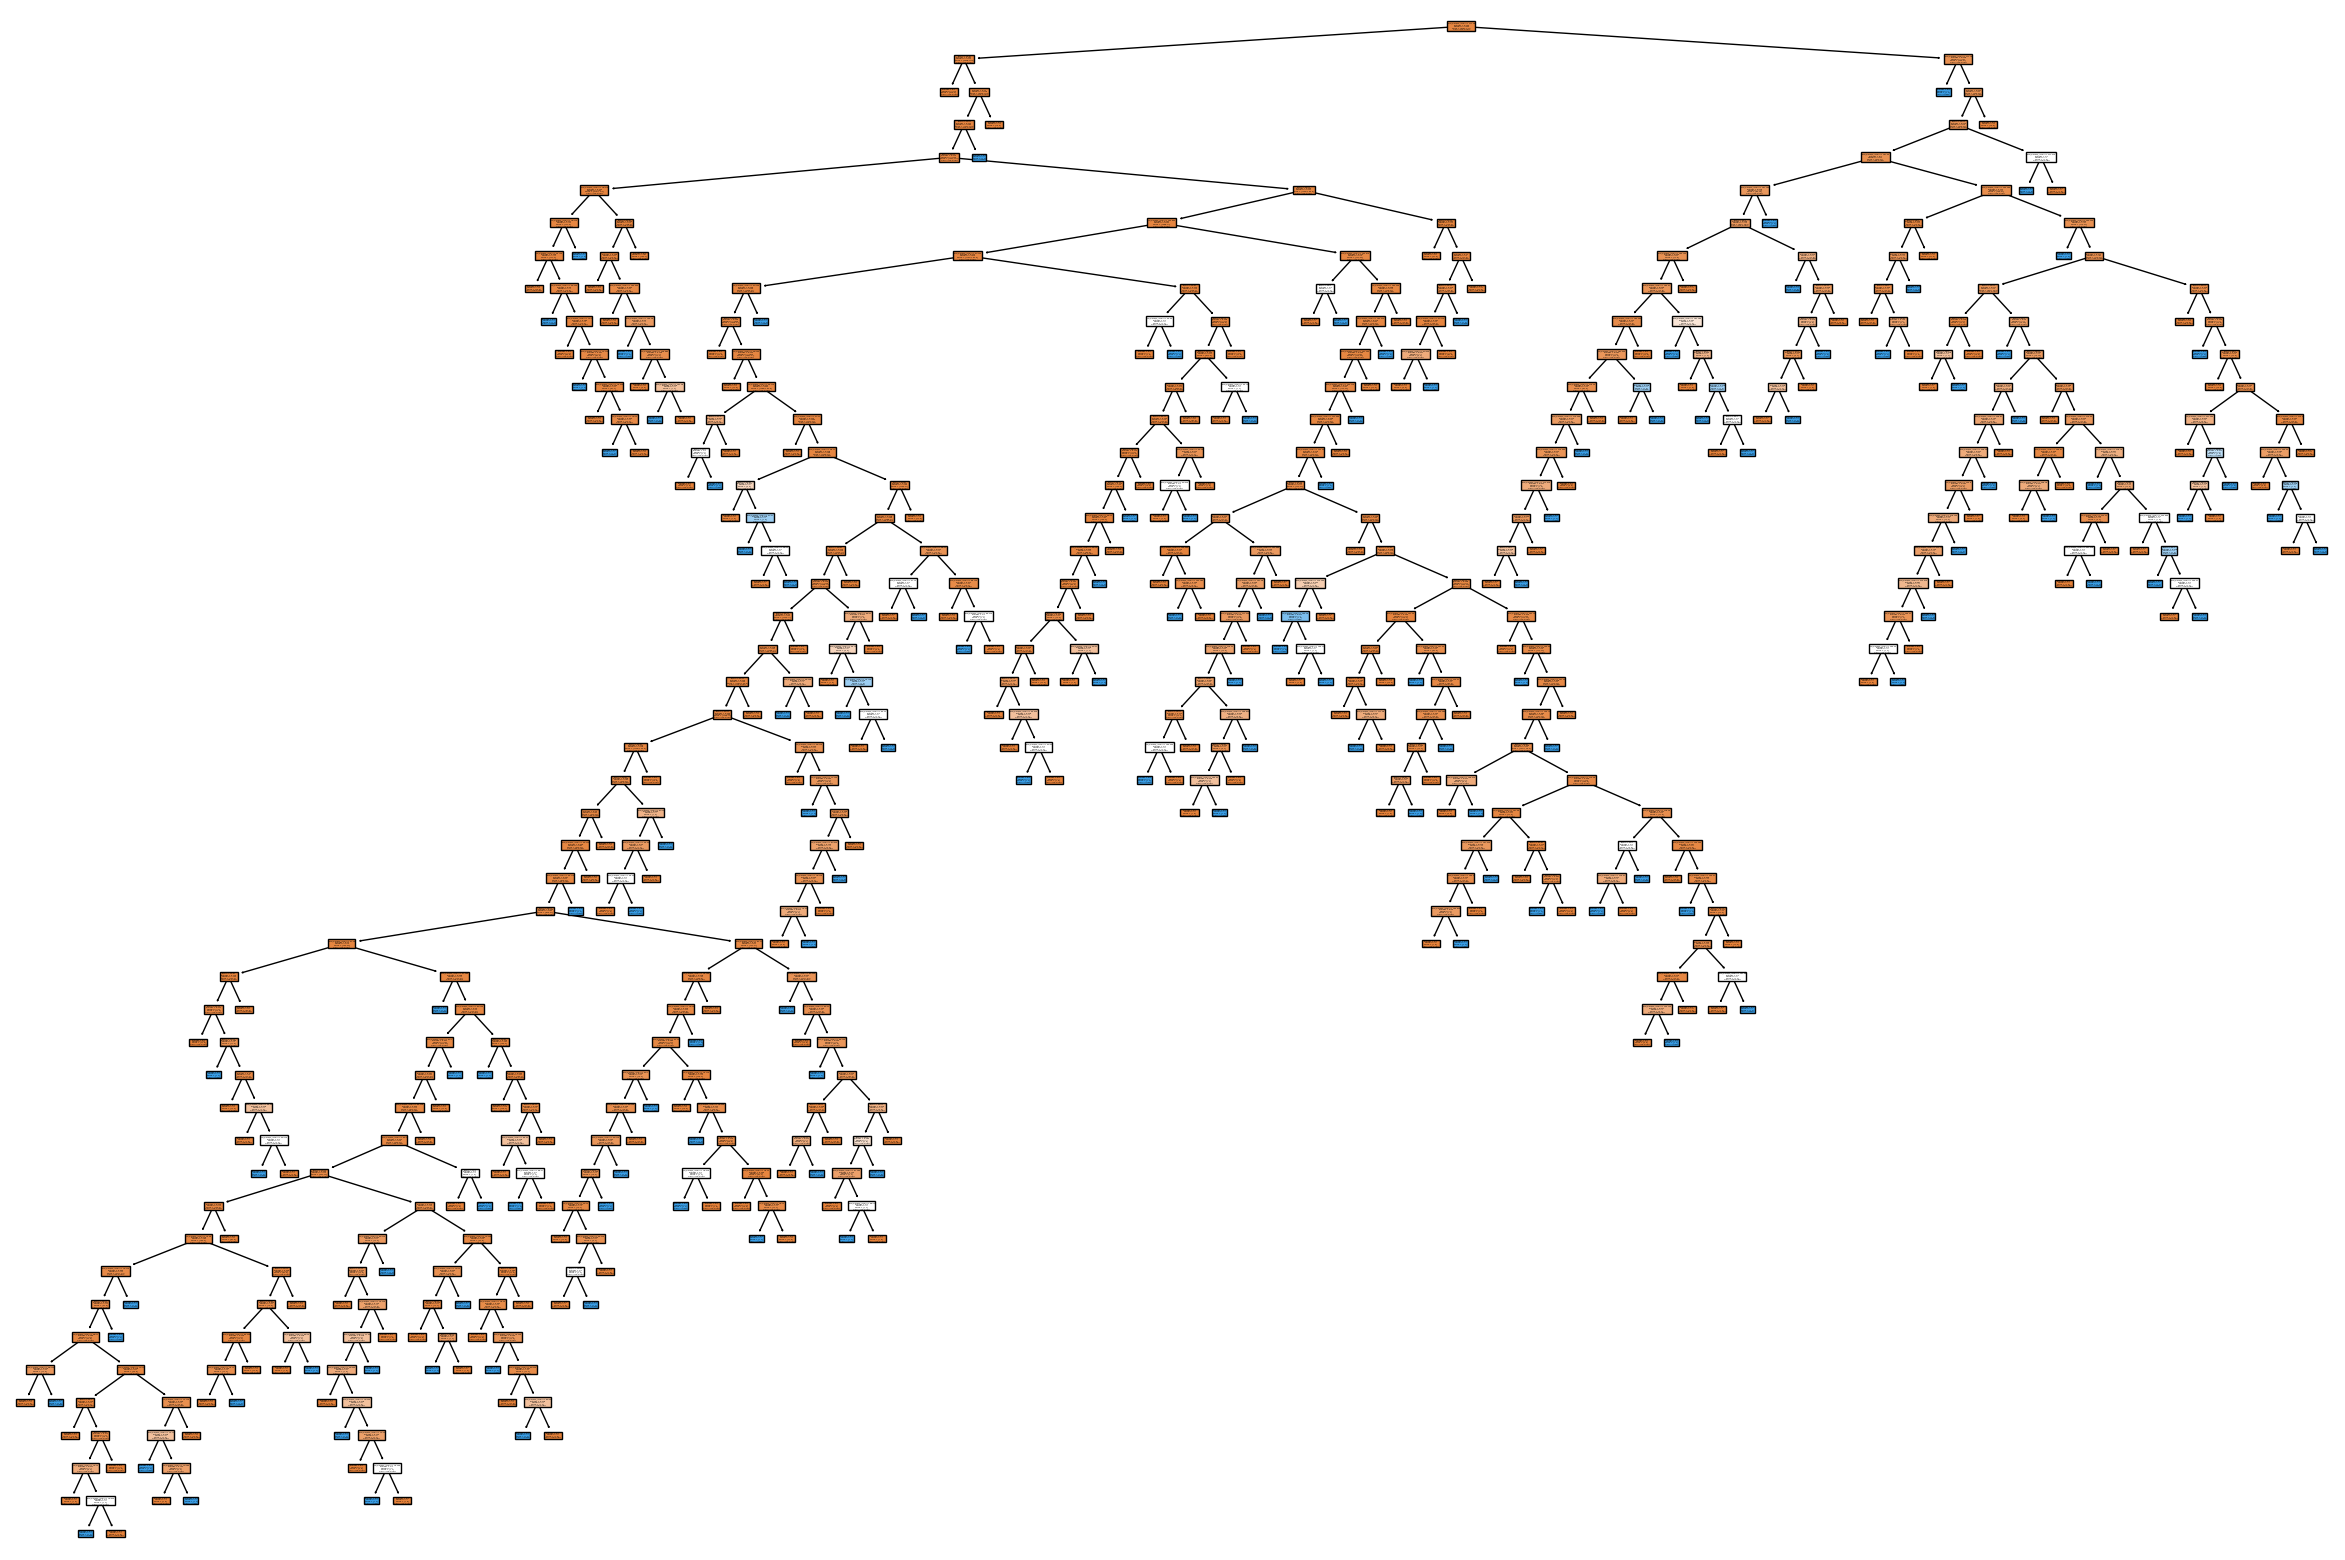

In [20]:
plt.figure(figsize=(30, 20))
plot_tree(model, feature_names=features, class_names=['No Stroke', 'Stroke'], filled=True)
plt.show()

In [21]:
tree_rules = export_text(model, feature_names=features)
print(tree_rules)

|--- avg_glucose_level <= 171.08
|   |--- bmi <= 19.35
|   |   |--- class: 0
|   |--- bmi >  19.35
|   |   |--- bmi <= 44.15
|   |   |   |--- bmi <= 44.05
|   |   |   |   |--- bmi <= 22.25
|   |   |   |   |   |--- avg_glucose_level <= 78.88
|   |   |   |   |   |   |--- avg_glucose_level <= 78.61
|   |   |   |   |   |   |   |--- avg_glucose_level <= 66.71
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- avg_glucose_level >  66.71
|   |   |   |   |   |   |   |   |--- avg_glucose_level <= 66.97
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- avg_glucose_level >  66.97
|   |   |   |   |   |   |   |   |   |--- avg_glucose_level <= 74.00
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- avg_glucose_level >  74.00
|   |   |   |   |   |   |   |   |   |   |--- avg_glucose_level <= 74.12
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |  

### Decision Tree dengan pruning (Max Depth = 3)

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn import tree

clf_p3 = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf_p3.fit(X_train, y_train)

y_pred_p = clf_p3.predict(X_test)

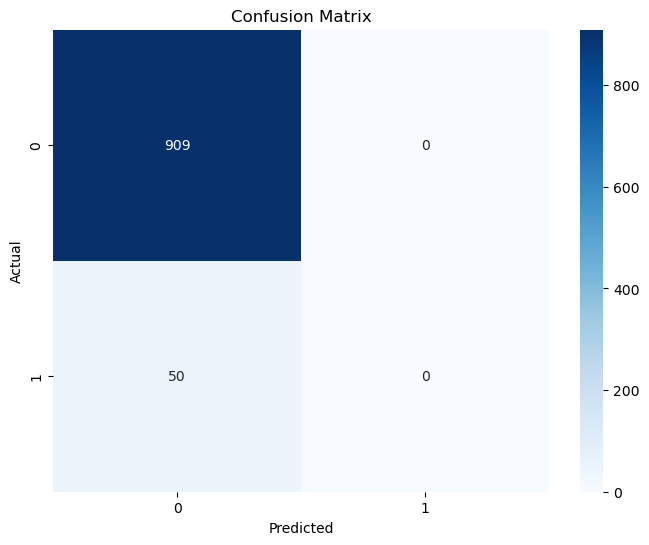


Accuracy: 0.9478623566214807

Cross-Validation Scores:  [0.95828989 0.95933264 0.95824635 0.95929019 0.95929019]
Mean Accuracy:  0.9588898491600288
Standard Deviation:  0.0005080662439927236


In [23]:
conf_matrix3 = confusion_matrix(y_test, y_pred_p)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix3, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

accuracy = (conf_matrix3[0, 0] + conf_matrix3[1, 1]) / np.sum(conf_matrix3)
print("\nAccuracy:", accuracy)

scores = cross_val_score(clf_p3, df[features], df[target], cv=5, scoring='accuracy')

print("\nCross-Validation Scores: ", scores)
print("Mean Accuracy: ", np.mean(scores))

print("Standard Deviation: ", np.std(scores))

In [24]:
tree_rules = export_text(clf_p3, feature_names=features)
print(tree_rules)

|--- avg_glucose_level <= 171.08
|   |--- bmi <= 19.35
|   |   |--- class: 0
|   |--- bmi >  19.35
|   |   |--- bmi <= 44.15
|   |   |   |--- class: 0
|   |   |--- bmi >  44.15
|   |   |   |--- class: 0
|--- avg_glucose_level >  171.08
|   |--- avg_glucose_level <= 171.75
|   |   |--- class: 1
|   |--- avg_glucose_level >  171.75
|   |   |--- bmi <= 46.30
|   |   |   |--- class: 0
|   |   |--- bmi >  46.30
|   |   |   |--- class: 0



### Decision Tree dengan pruning (Max Depth = 4)

In [25]:
clf_p4 = DecisionTreeClassifier(criterion="entropy", max_depth=4)
clf_p4.fit(X_train, y_train)

y_pred_p = clf_p4.predict(X_test)

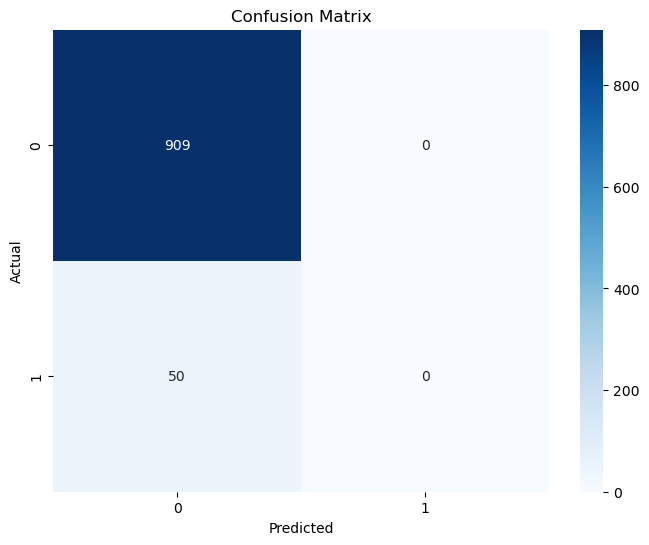


Accuracy: 0.9478623566214807

Cross-Validation Scores:  [0.95828989 0.95933264 0.95615866 0.95929019 0.95929019]
Mean Accuracy:  0.9584723126255821
Standard Deviation:  0.0012218224231156933


In [26]:
conf_matrix4 = confusion_matrix(y_test, y_pred_p)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix4, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

accuracy = (conf_matrix4[0, 0] + conf_matrix4[1, 1]) / np.sum(conf_matrix4)
print("\nAccuracy:", accuracy)

scores = cross_val_score(clf_p4, df[features], df[target], cv=5, scoring='accuracy')

print("\nCross-Validation Scores: ", scores)
print("Mean Accuracy: ", np.mean(scores))
print("Standard Deviation: ", np.std(scores))

In [27]:
tree_rules = export_text(clf_p4, feature_names=features)
print(tree_rules)

|--- avg_glucose_level <= 171.08
|   |--- bmi <= 19.35
|   |   |--- class: 0
|   |--- bmi >  19.35
|   |   |--- bmi <= 44.15
|   |   |   |--- bmi <= 44.05
|   |   |   |   |--- class: 0
|   |   |   |--- bmi >  44.05
|   |   |   |   |--- class: 1
|   |   |--- bmi >  44.15
|   |   |   |--- class: 0
|--- avg_glucose_level >  171.08
|   |--- avg_glucose_level <= 171.75
|   |   |--- class: 1
|   |--- avg_glucose_level >  171.75
|   |   |--- bmi <= 46.30
|   |   |   |--- bmi <= 45.55
|   |   |   |   |--- class: 0
|   |   |   |--- bmi >  45.55
|   |   |   |   |--- class: 0
|   |   |--- bmi >  46.30
|   |   |   |--- class: 0



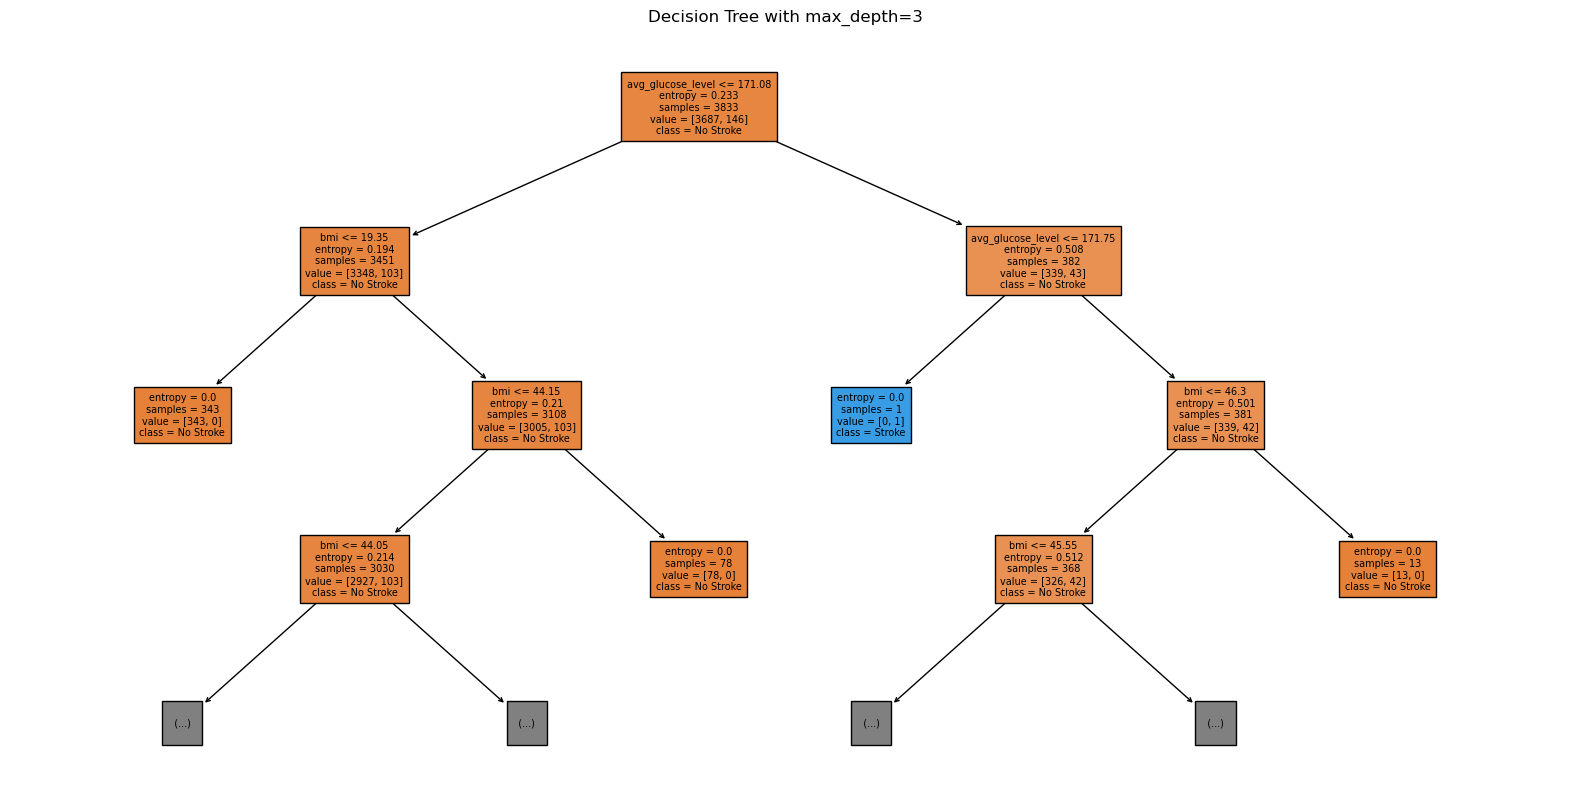

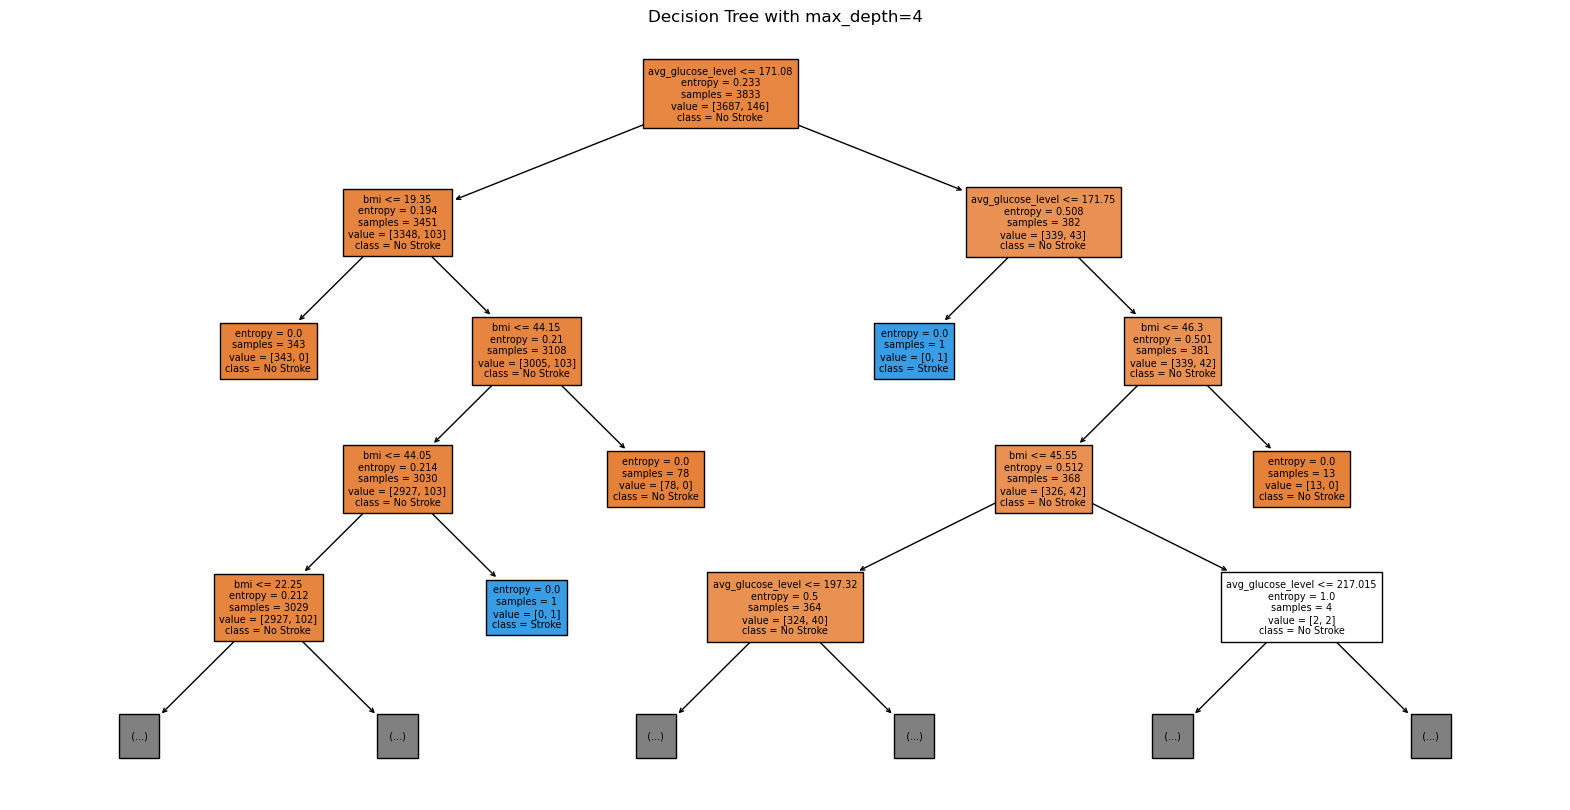

In [28]:
max_depths = [3, 4]
for max_depth in max_depths:
    plt.figure(figsize=(20, 10))
    plot_tree(model, feature_names=features, class_names=['No Stroke', 'Stroke'], filled=True, max_depth=max_depth,fontsize=7)
    plt.title(f'Decision Tree with max_depth={max_depth}')
    plt.show()

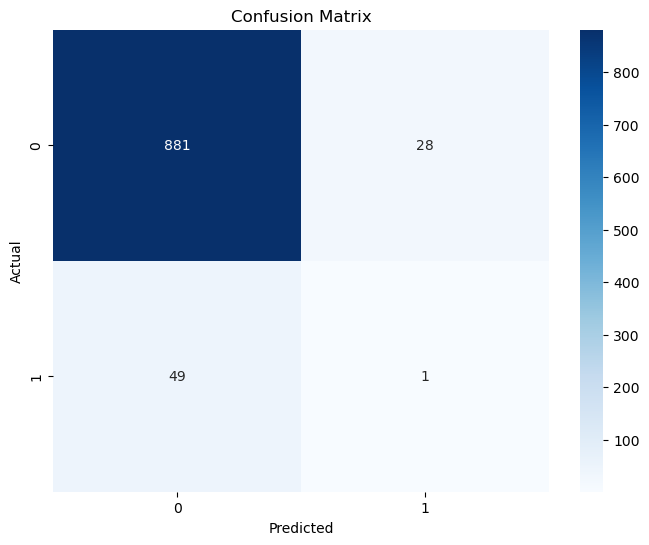


Accuracy: 0.9197080291970803

Cross-Validation Scores:  [0.95828989 0.95933264 0.95929019 0.95929019 0.93632568]
Mean Accuracy:  0.9545057155483377
Standard Deviation:  0.00909851879186492


In [29]:
# SVM
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

X = df[['avg_glucose_level', 'bmi']]
y = df['stroke']
ga u
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm = SVC(kernel='sigmoid', random_state=42)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

conf_matrix5 = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix5, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

accuracy = (conf_matrix5[0, 0] + conf_matrix5[1, 1]) / np.sum(conf_matrix5)
print("\nAccuracy:", accuracy)

scores = cross_val_score(svm, X, y, cv=5, scoring='accuracy')
print("\nCross-Validation Scores: ", scores)
print("Mean Accuracy: ", np.mean(scores))
print("Standard Deviation: ", np.std(scores))